In [1]:
import argparse
import logging
import os

import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms

from utils.data_loading import BasicDataset
from unet import UNet
from utils.utils import plot_img_and_mask

In [2]:
def predict_img(net,
                full_img,
                device,
                scale_factor=1,
                out_threshold=0.5):
    net.eval()
    img = torch.from_numpy(BasicDataset.preprocess(full_img, scale_factor, is_mask=False))
    img = img.unsqueeze(0)
    img = img.to(device=device, dtype=torch.float32)
    print(img.shape)
    with torch.no_grad():
        output = net(img)

        if net.n_classes > 1:
            probs = F.softmax(output, dim=1)[0]
        else:
            probs = torch.sigmoid(output)[0]

#        tf = transforms.Compose([
#            transforms.ToPILImage(),
#            transforms.Resize((full_img.size[1], full_img.size[0])),
#            transforms.ToTensor()
#        ])
#        full_mask = tf(probs.cpu()).squeeze()
        full_mask = probs.cpu()
    if net.n_classes == 1:
        return (full_mask > out_threshold).numpy()
    else:
        return F.one_hot(full_mask.argmax(dim=0), net.n_classes).permute(2, 0, 1).numpy()


def get_args():
    parser = argparse.ArgumentParser(description='Predict masks from input images')
    parser.add_argument('--model', '-m', default='MODEL.pth', metavar='FILE',
                        help='Specify the file in which the model is stored')
    parser.add_argument('--input', '-i', metavar='INPUT', nargs='+', help='Filenames of input images', required=True)
    parser.add_argument('--output', '-o', metavar='OUTPUT', nargs='+', help='Filenames of output images')
    parser.add_argument('--viz', '-v', action='store_true',
                        help='Visualize the images as they are processed')
    parser.add_argument('--no-save', '-n', action='store_true', help='Do not save the output masks')
    parser.add_argument('--mask-threshold', '-t', type=float, default=0.5,
                        help='Minimum probability value to consider a mask pixel white')
    parser.add_argument('--scale', '-s', type=float, default=0.5,
                        help='Scale factor for the input images')
    parser.add_argument('--bilinear', action='store_true', default=False, help='Use bilinear upsampling')

    return parser.parse_args()


def get_output_filenames(args):
    def _generate_name(fn):
        return f'{os.path.splitext(fn)[0]}_OUT.png'

    return args.output or list(map(_generate_name, args.input))


def mask_to_image(mask: np.ndarray):
    if mask.ndim == 2:
        return Image.fromarray((mask * 255).astype(np.uint8))
    elif mask.ndim == 3:
        return Image.fromarray((np.argmax(mask, axis=0) * 255 / mask.shape[0]).astype(np.uint8))

loading model
model loaded
predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000000_post_disaster.png
torch.Size([1, 3, 256, 256])


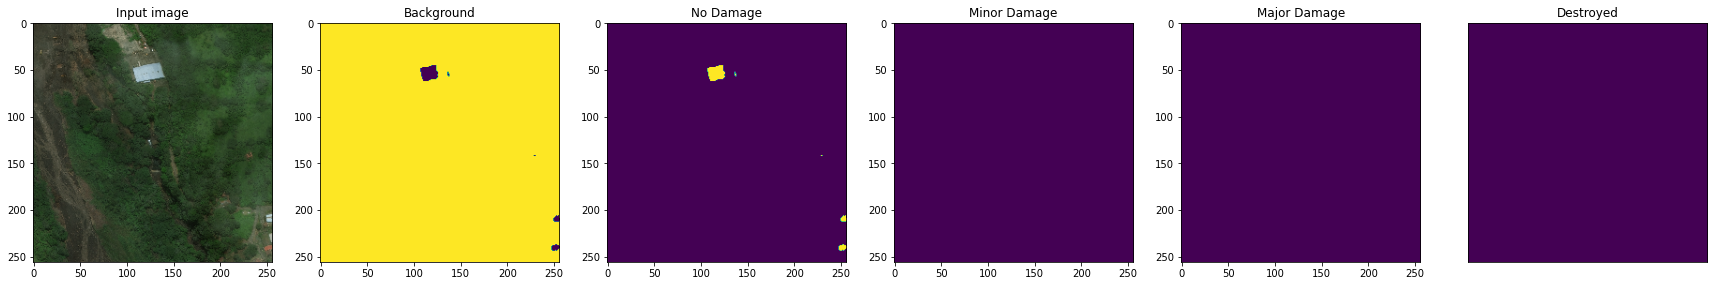

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000001_post_disaster.png
torch.Size([1, 3, 256, 256])


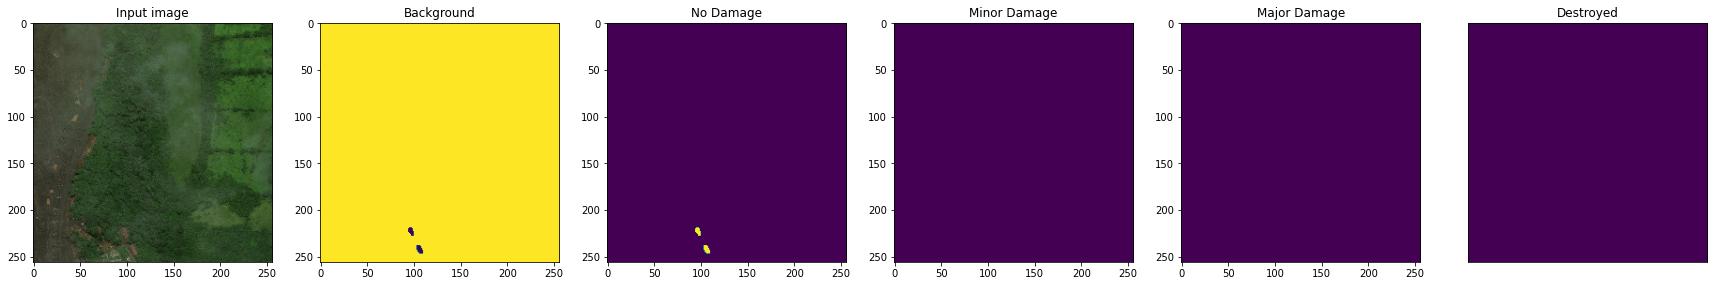

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000002_post_disaster.png
torch.Size([1, 3, 256, 256])


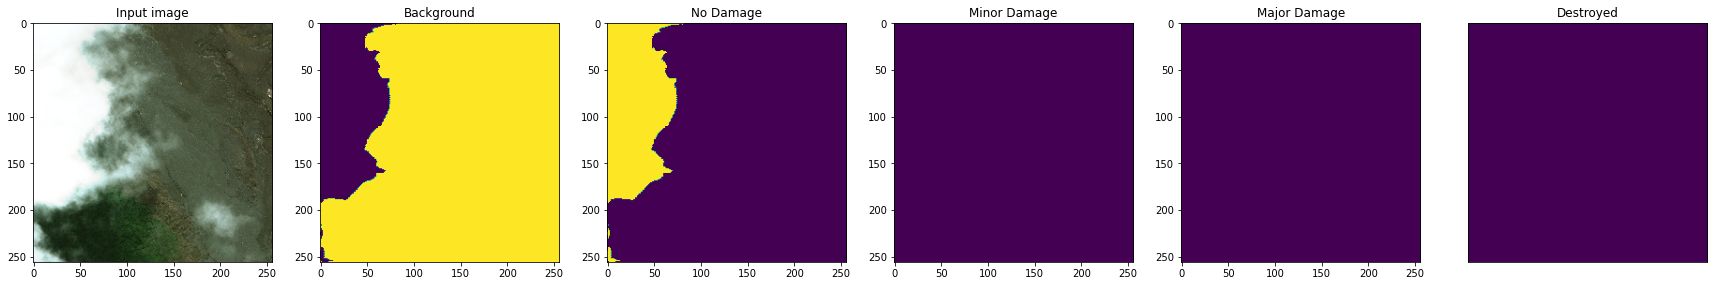

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000006_post_disaster.png
torch.Size([1, 3, 256, 256])


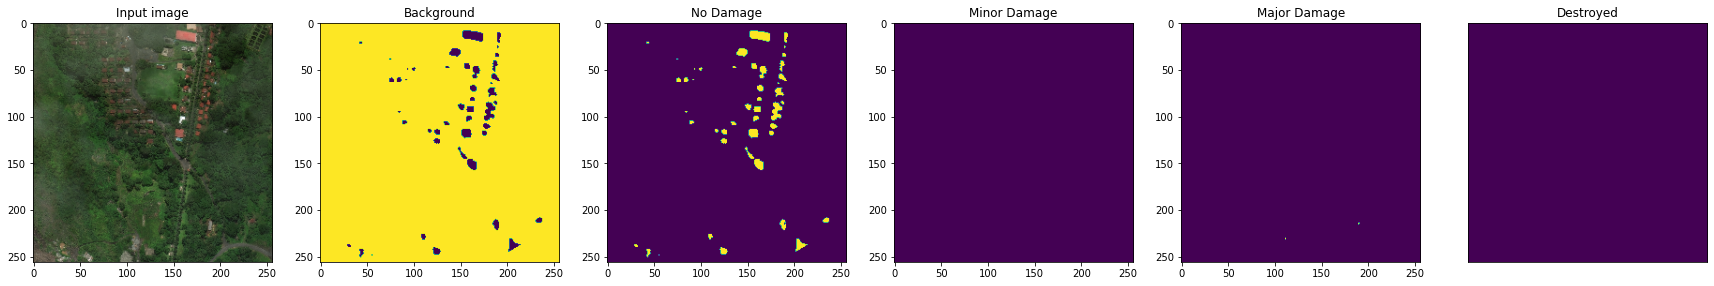

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000007_post_disaster.png
torch.Size([1, 3, 256, 256])


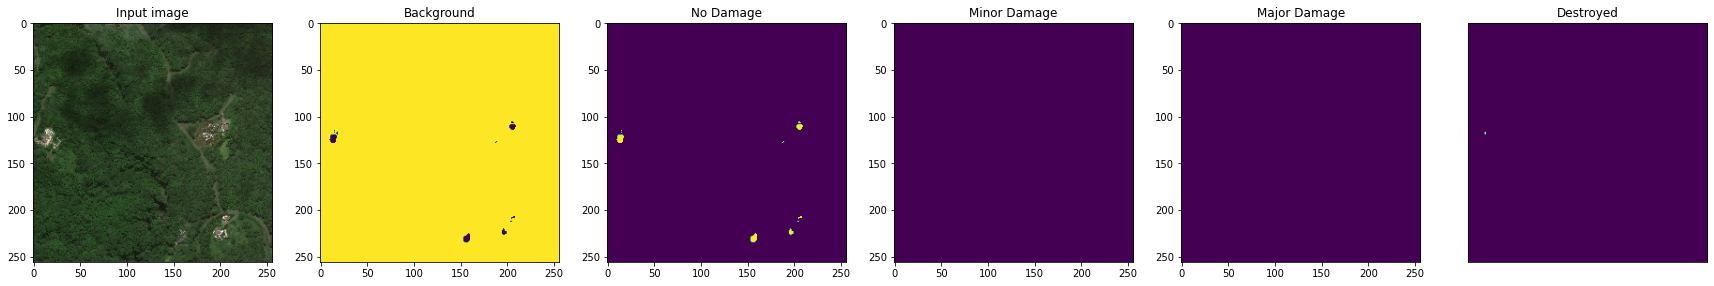

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000008_post_disaster.png
torch.Size([1, 3, 256, 256])


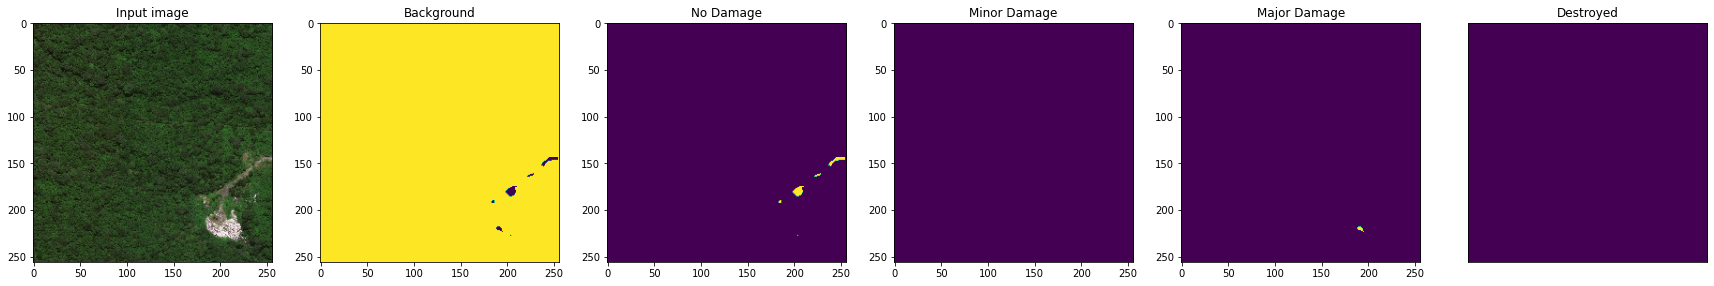

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000010_post_disaster.png
torch.Size([1, 3, 256, 256])


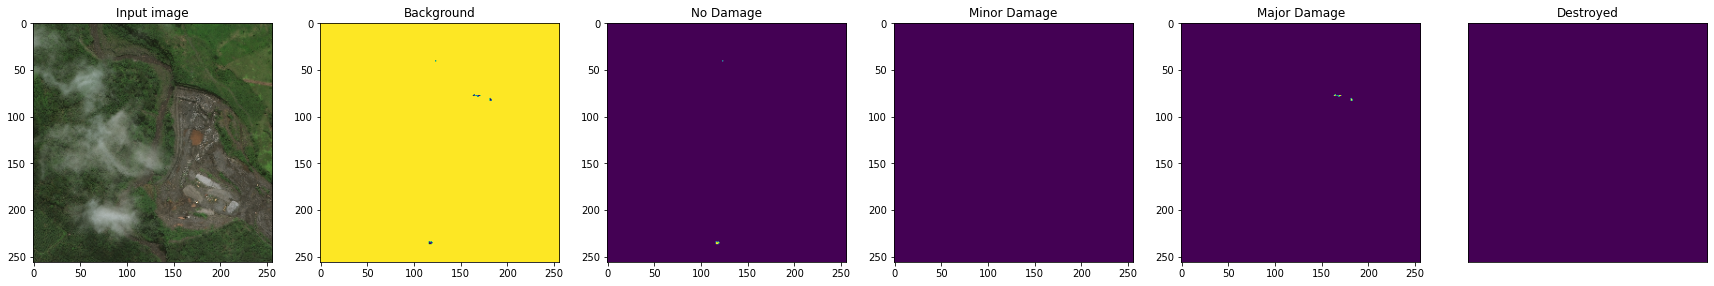

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000013_post_disaster.png
torch.Size([1, 3, 256, 256])


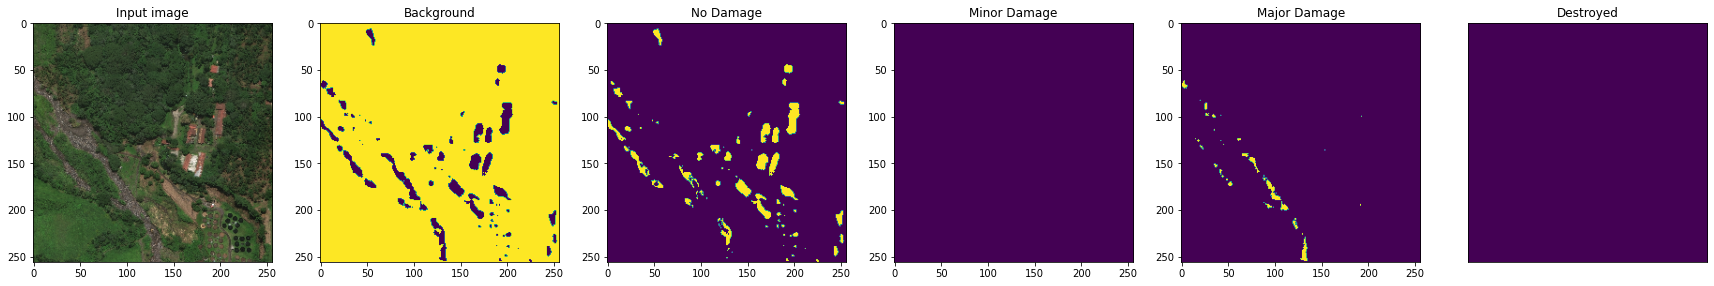

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000015_post_disaster.png
torch.Size([1, 3, 256, 256])


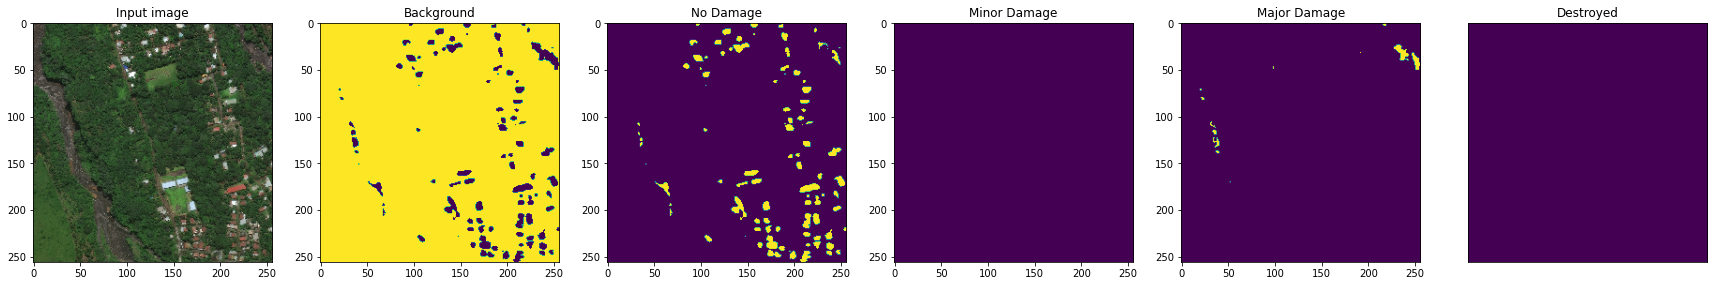

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000016_post_disaster.png
torch.Size([1, 3, 256, 256])


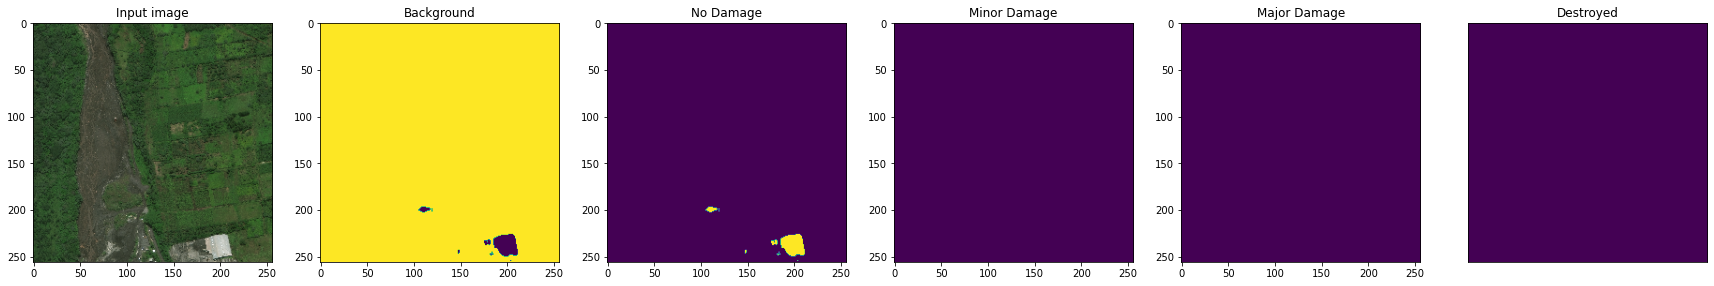

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000017_post_disaster.png
torch.Size([1, 3, 256, 256])


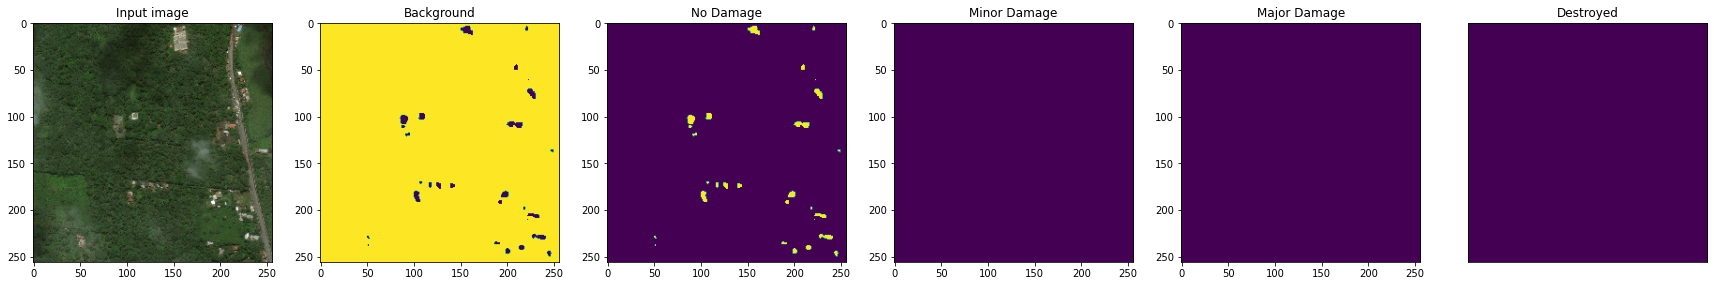

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000018_post_disaster.png
torch.Size([1, 3, 256, 256])


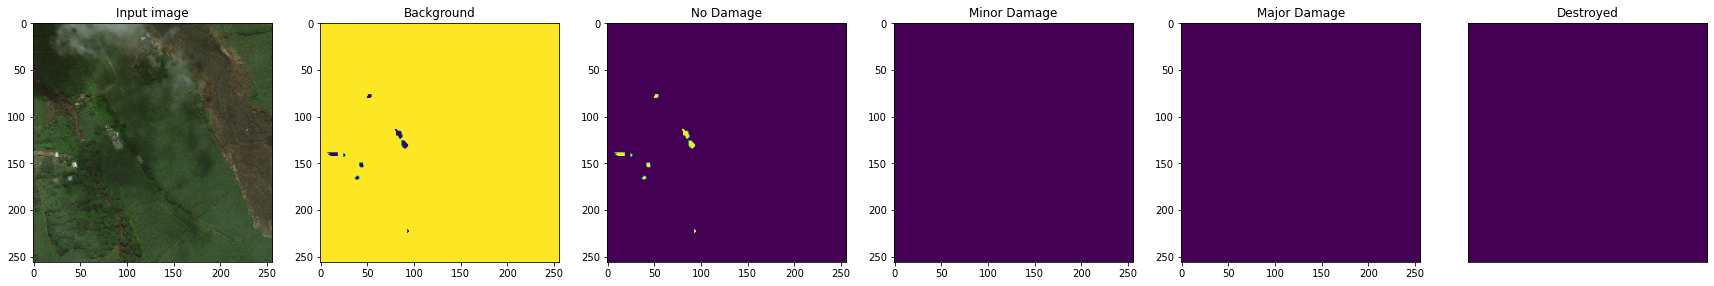

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000019_post_disaster.png
torch.Size([1, 3, 256, 256])


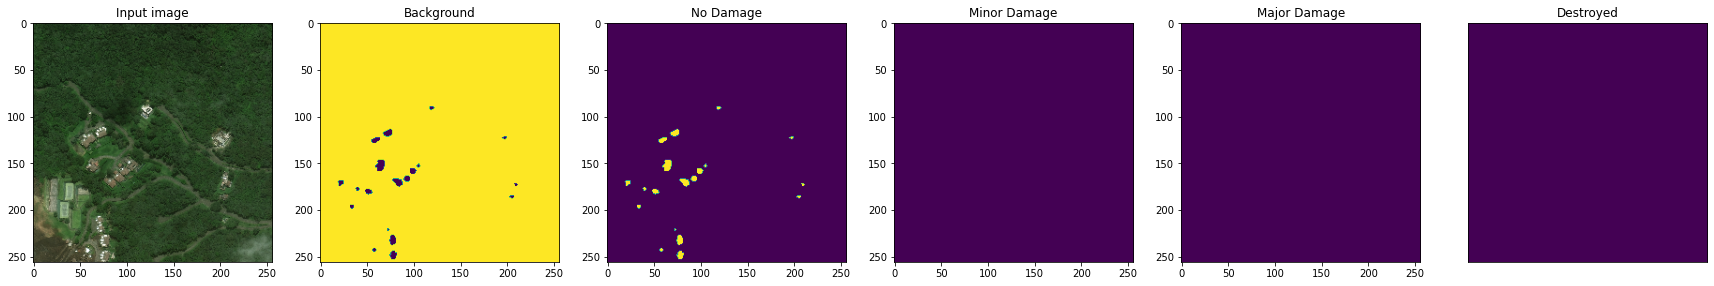

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000023_post_disaster.png
torch.Size([1, 3, 256, 256])


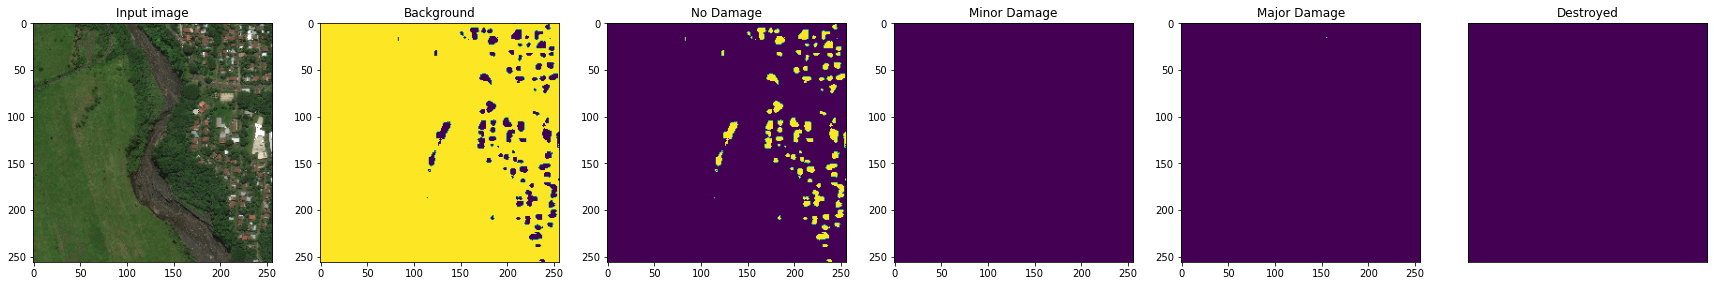

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000024_post_disaster.png
torch.Size([1, 3, 256, 256])


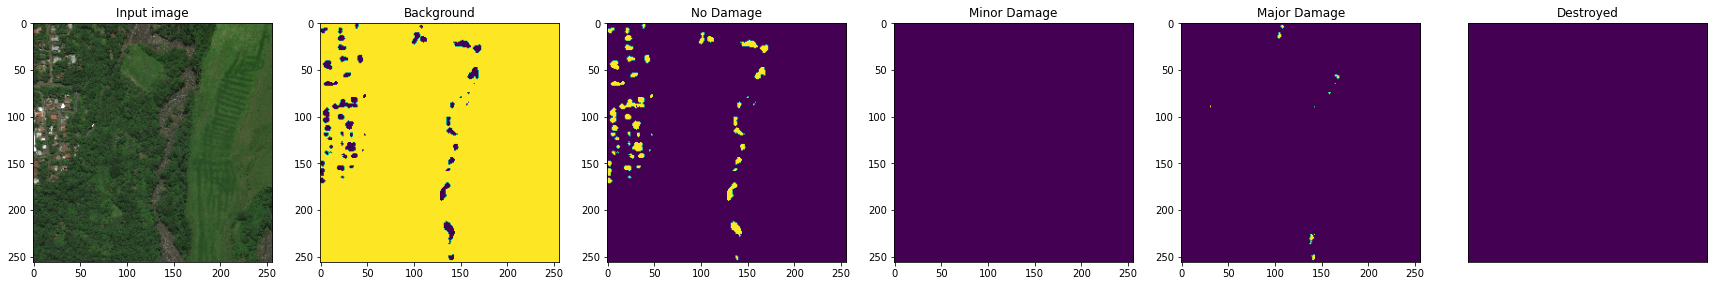

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000025_post_disaster.png
torch.Size([1, 3, 256, 256])


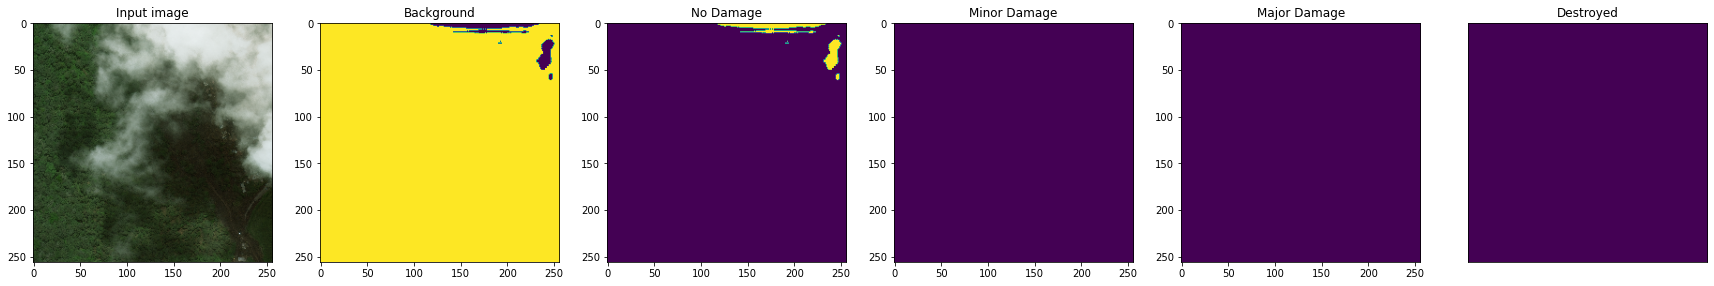

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000026_post_disaster.png
torch.Size([1, 3, 256, 256])


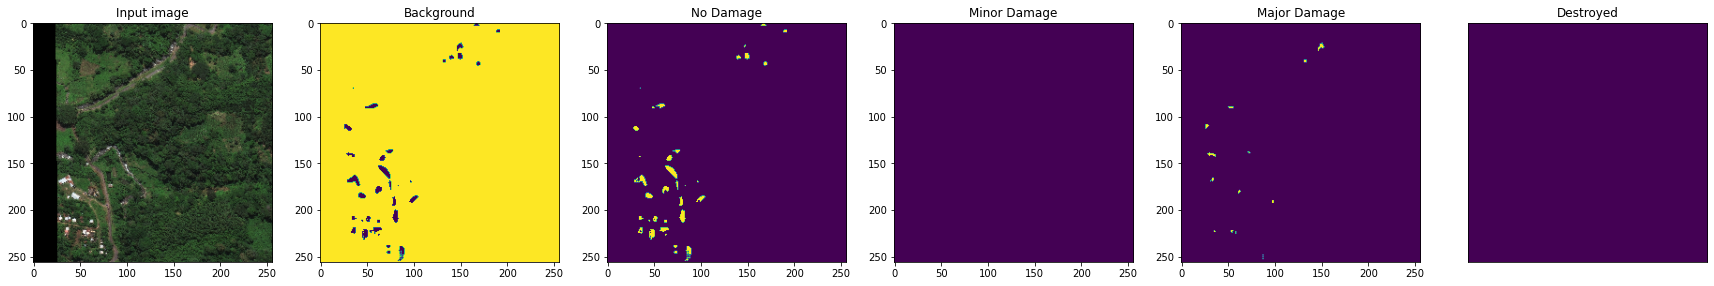

predicting .\Dataset\Tier1\Post\Image256\guatemala-volcano_00000027_post_disaster.png
torch.Size([1, 3, 256, 256])


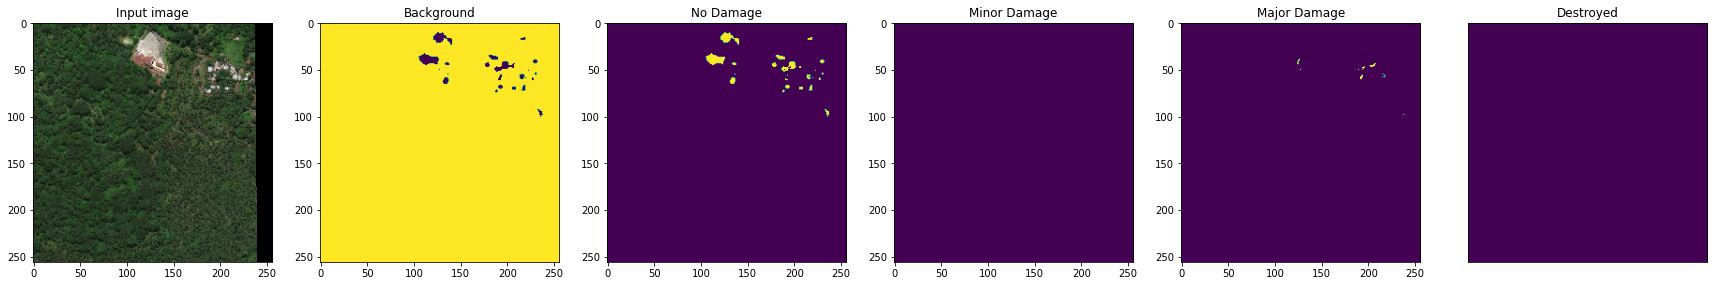

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000000_post_disaster.png
torch.Size([1, 3, 256, 256])


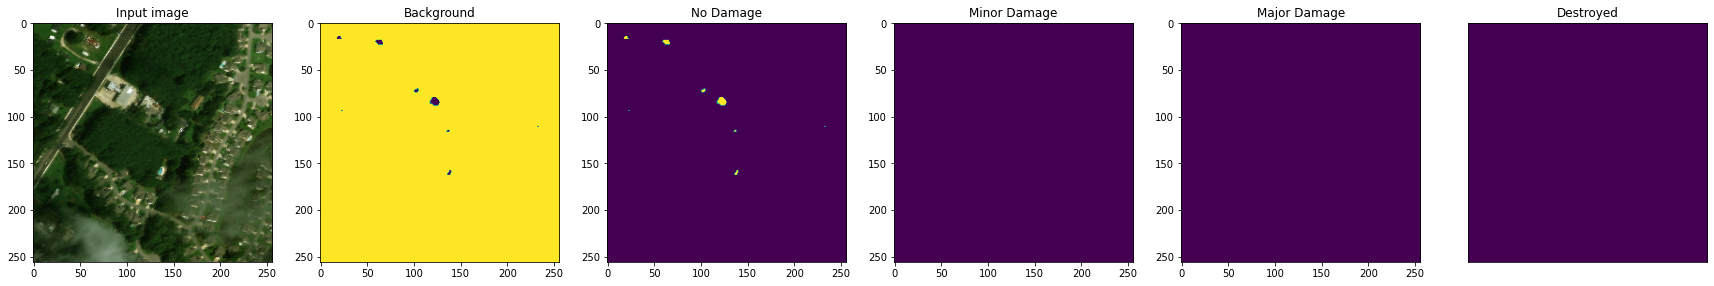

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000001_post_disaster.png
torch.Size([1, 3, 256, 256])


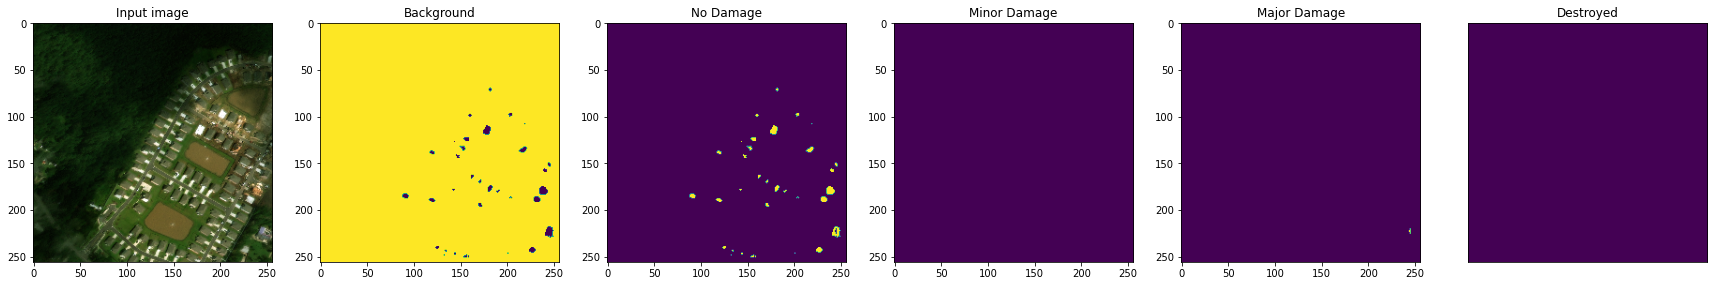

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000002_post_disaster.png
torch.Size([1, 3, 256, 256])


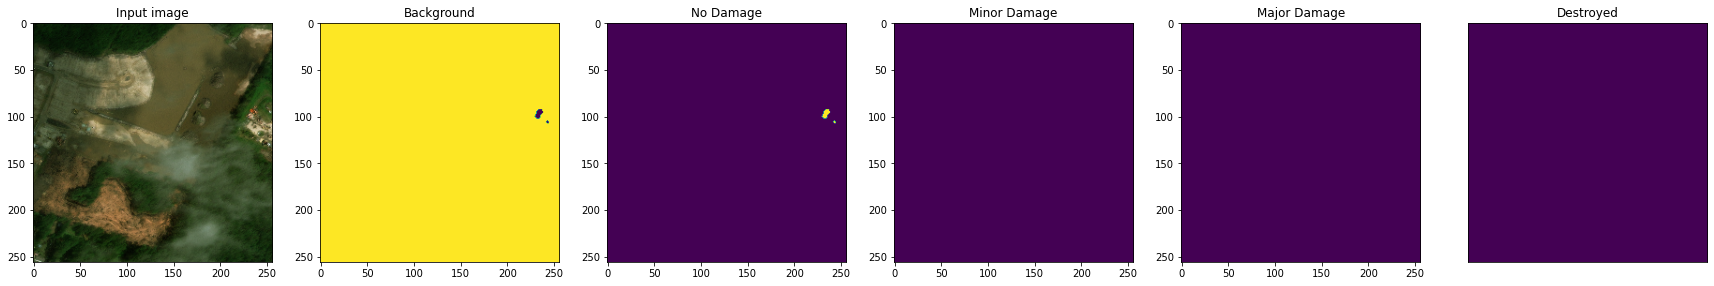

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000003_post_disaster.png
torch.Size([1, 3, 256, 256])


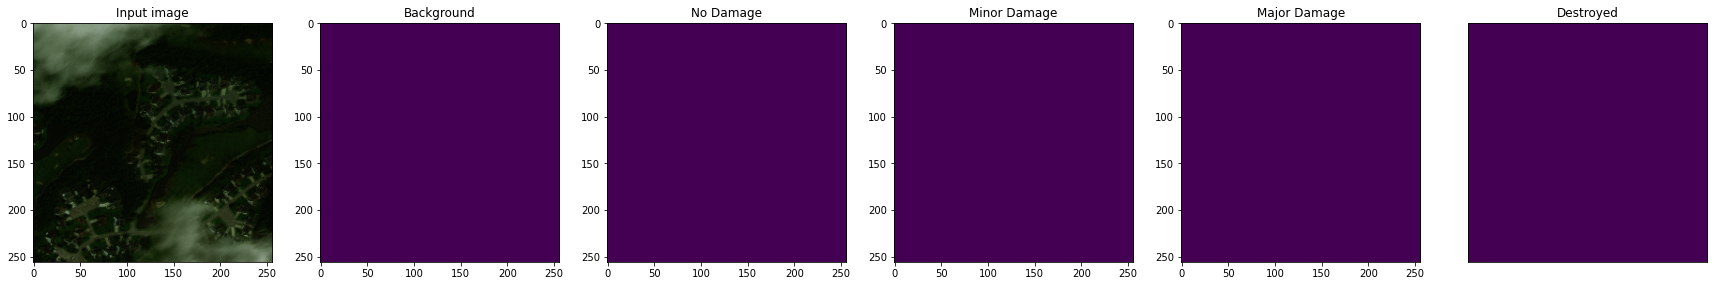

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000008_post_disaster.png
torch.Size([1, 3, 256, 256])


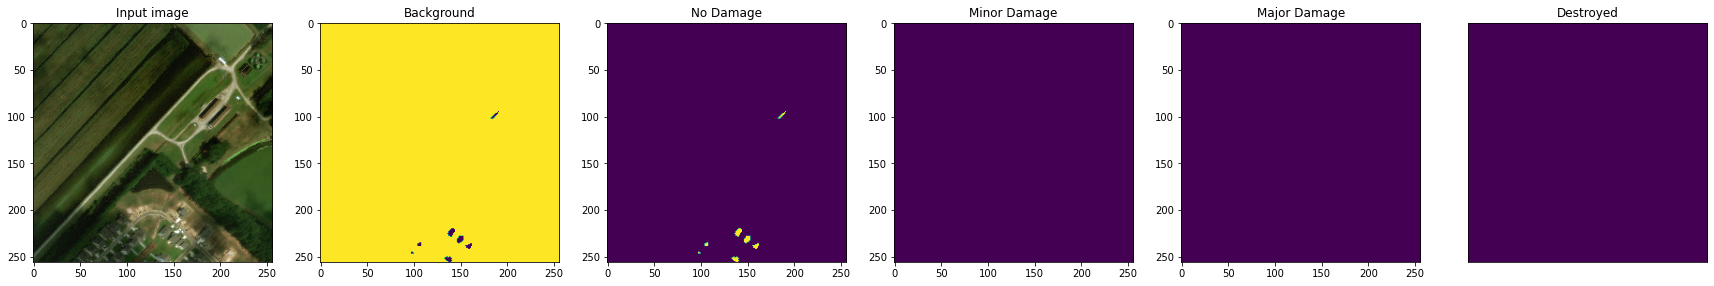

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000012_post_disaster.png
torch.Size([1, 3, 256, 256])


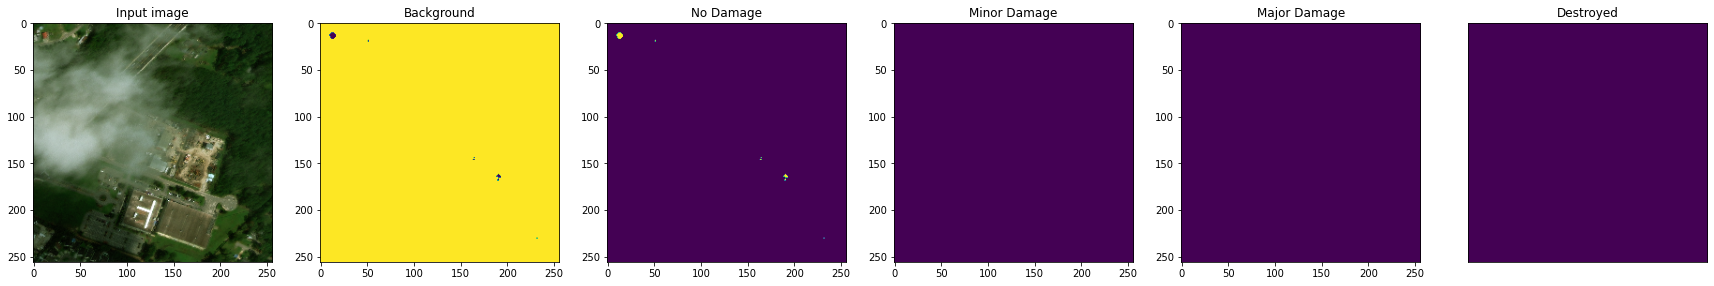

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000015_post_disaster.png
torch.Size([1, 3, 256, 256])


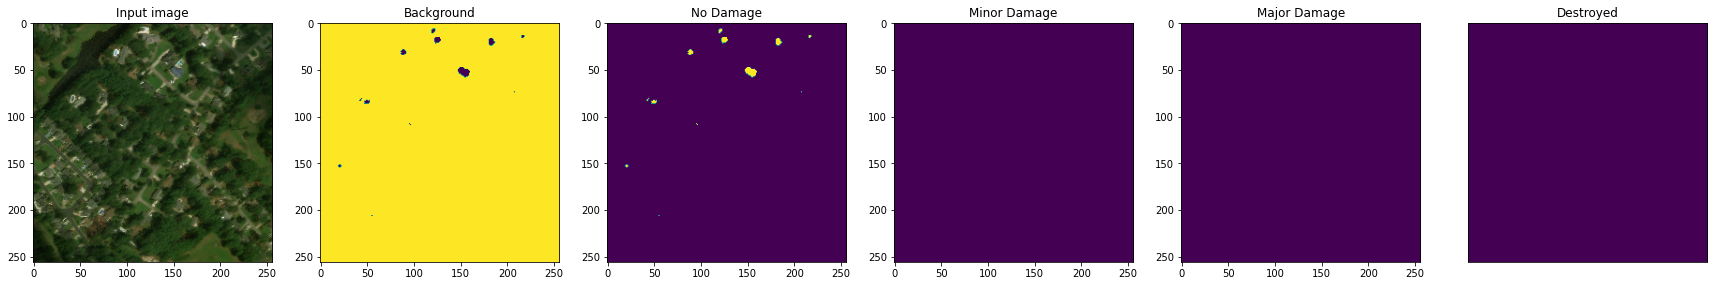

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000016_post_disaster.png
torch.Size([1, 3, 256, 256])


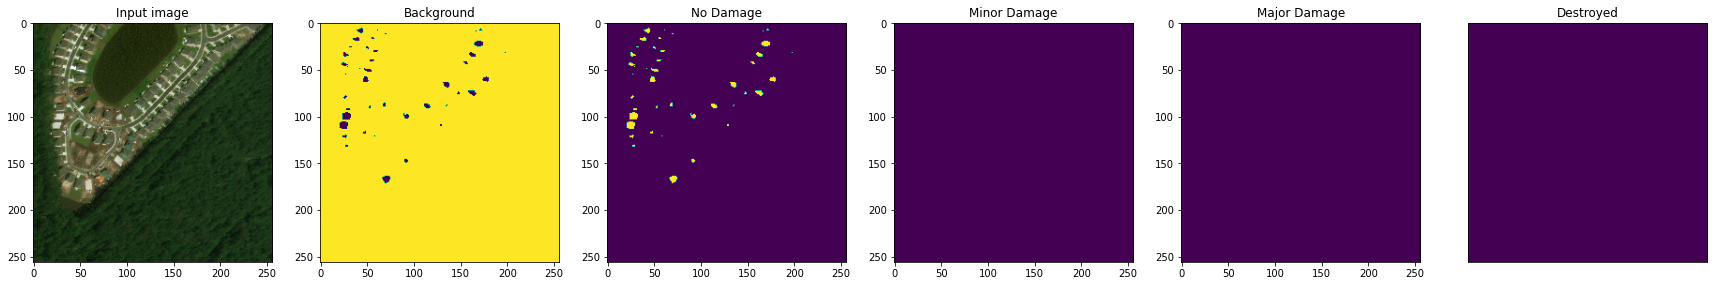

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000018_post_disaster.png
torch.Size([1, 3, 256, 256])


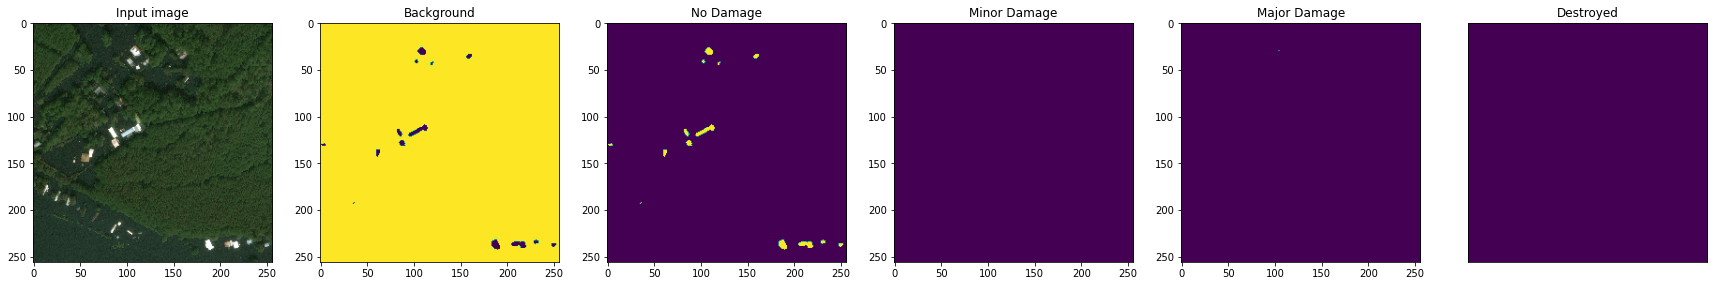

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000020_post_disaster.png
torch.Size([1, 3, 256, 256])


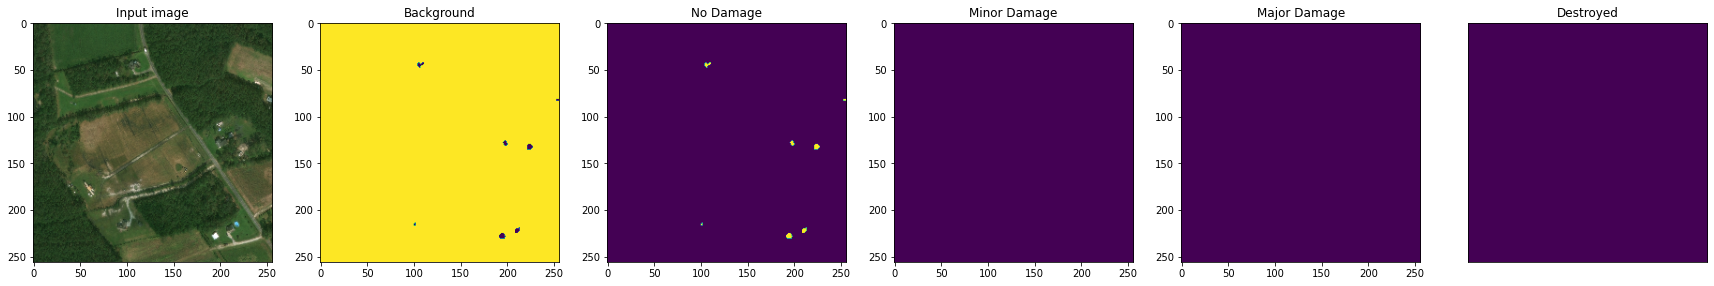

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000022_post_disaster.png
torch.Size([1, 3, 256, 256])


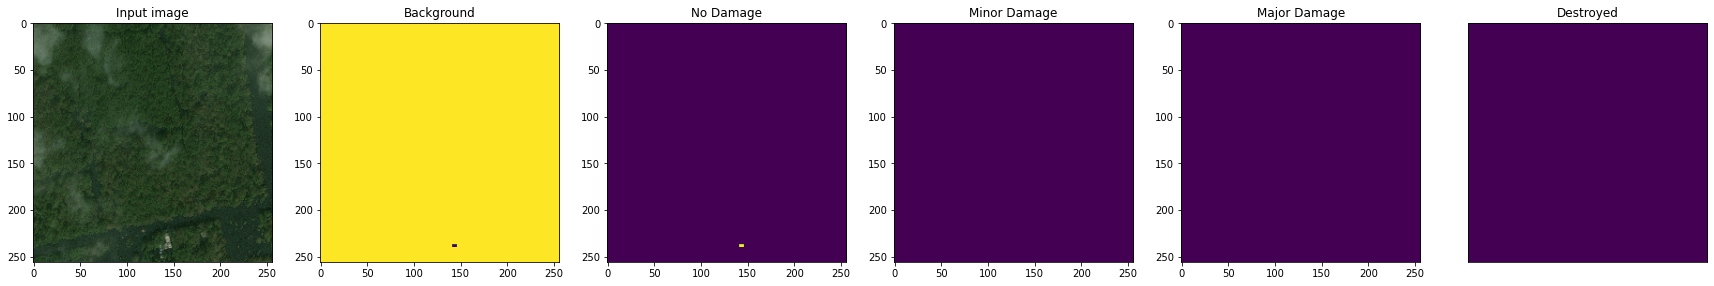

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000023_post_disaster.png
torch.Size([1, 3, 256, 256])


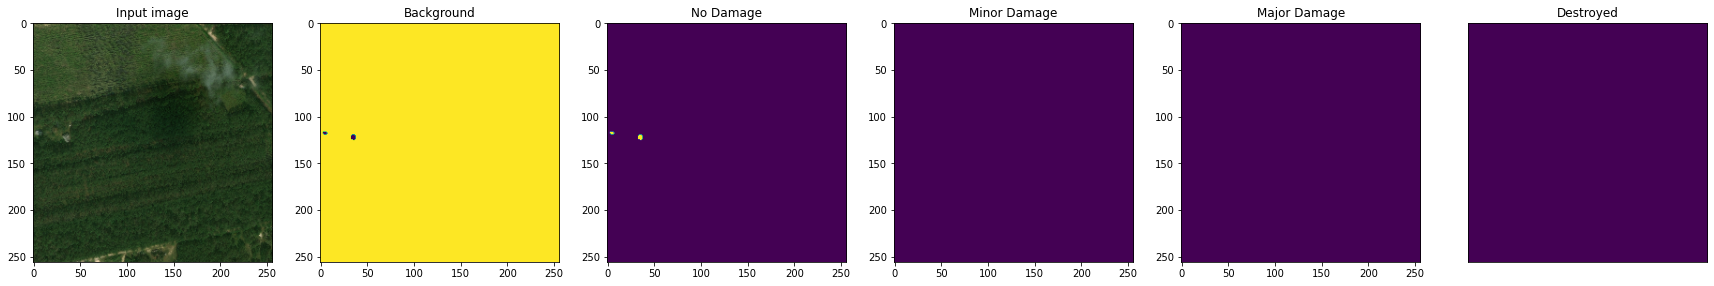

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000024_post_disaster.png
torch.Size([1, 3, 256, 256])


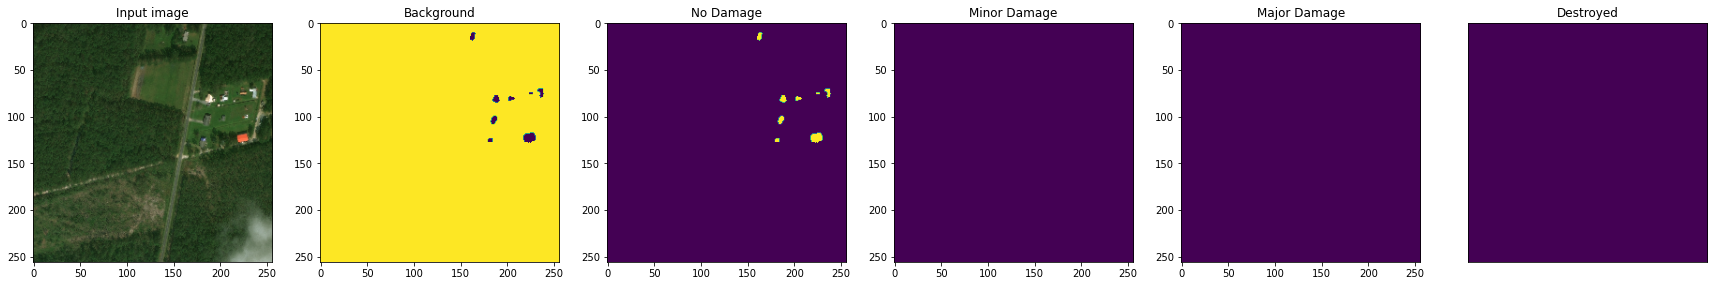

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000026_post_disaster.png
torch.Size([1, 3, 256, 256])


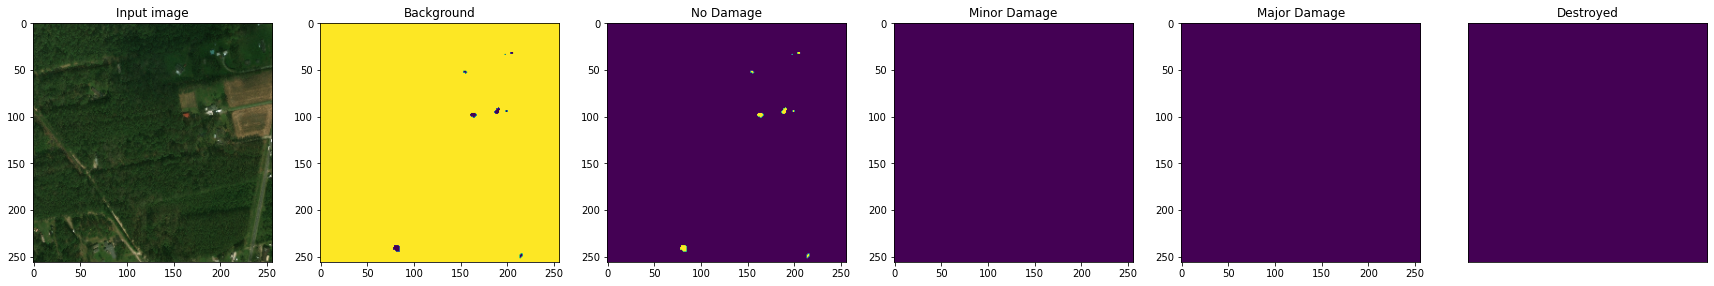

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000027_post_disaster.png
torch.Size([1, 3, 256, 256])


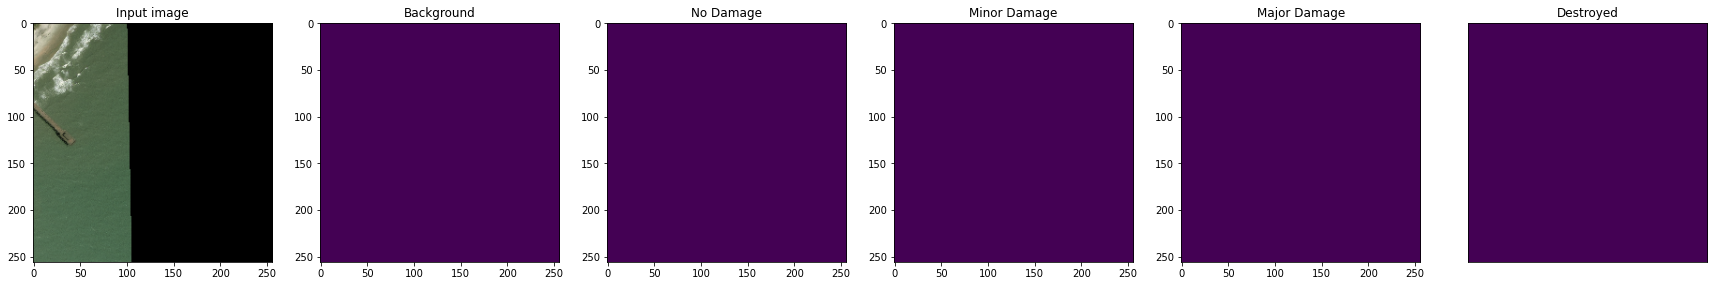

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000028_post_disaster.png
torch.Size([1, 3, 256, 256])


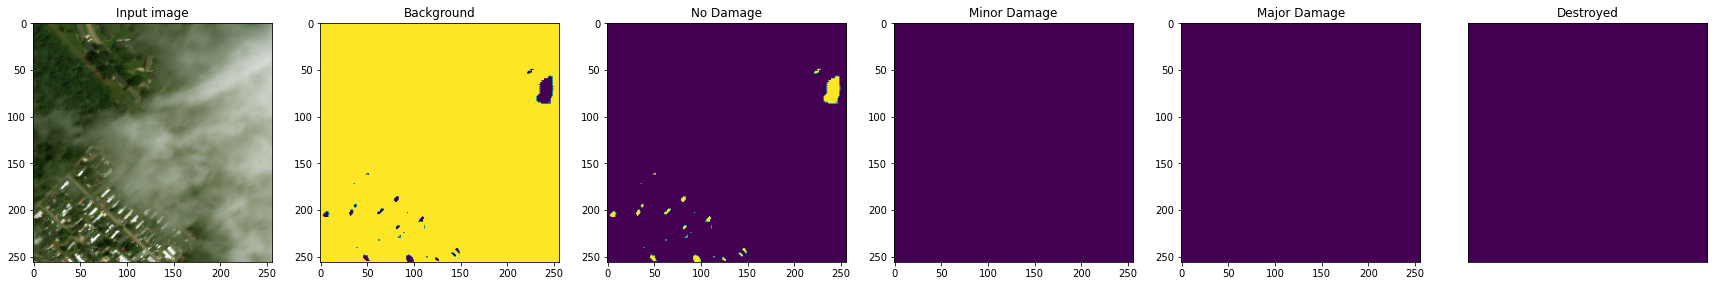

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000030_post_disaster.png
torch.Size([1, 3, 256, 256])


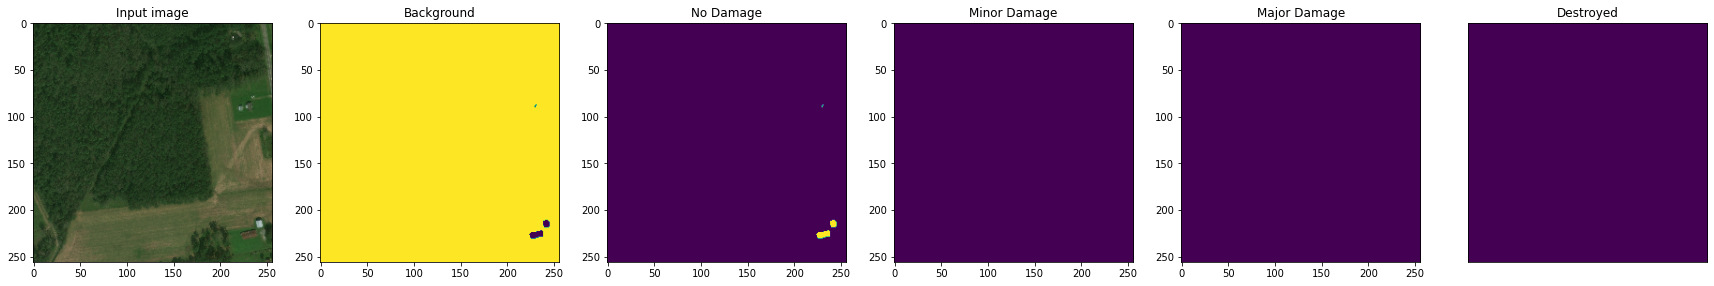

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000031_post_disaster.png
torch.Size([1, 3, 256, 256])


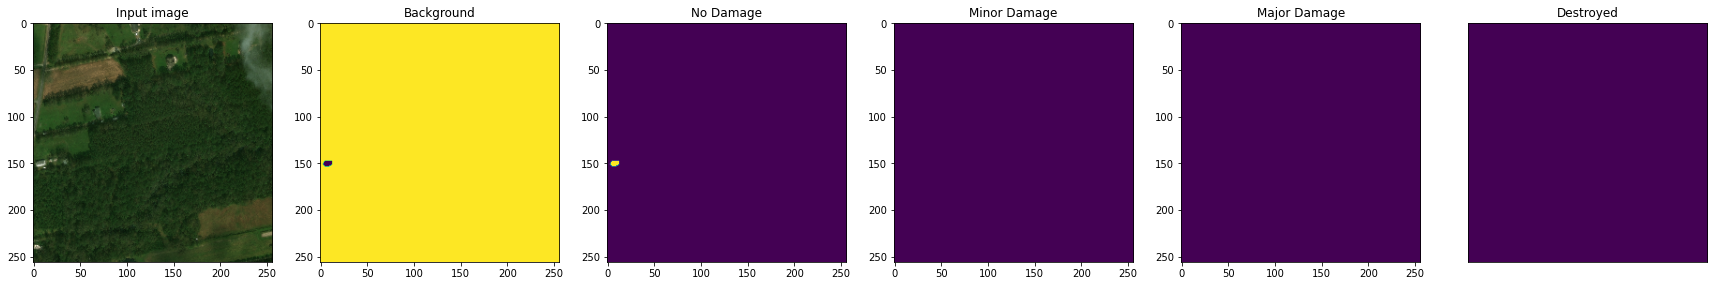

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000032_post_disaster.png
torch.Size([1, 3, 256, 256])


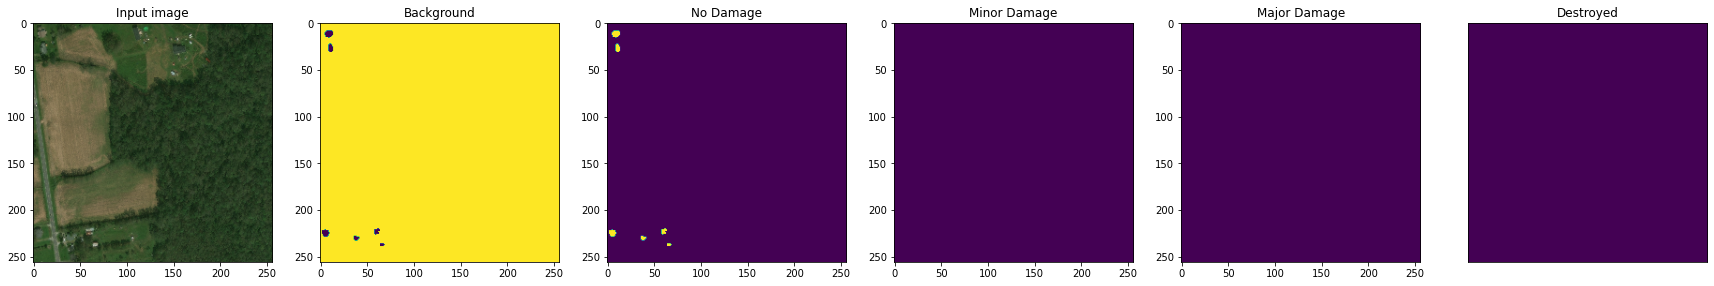

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000036_post_disaster.png
torch.Size([1, 3, 256, 256])


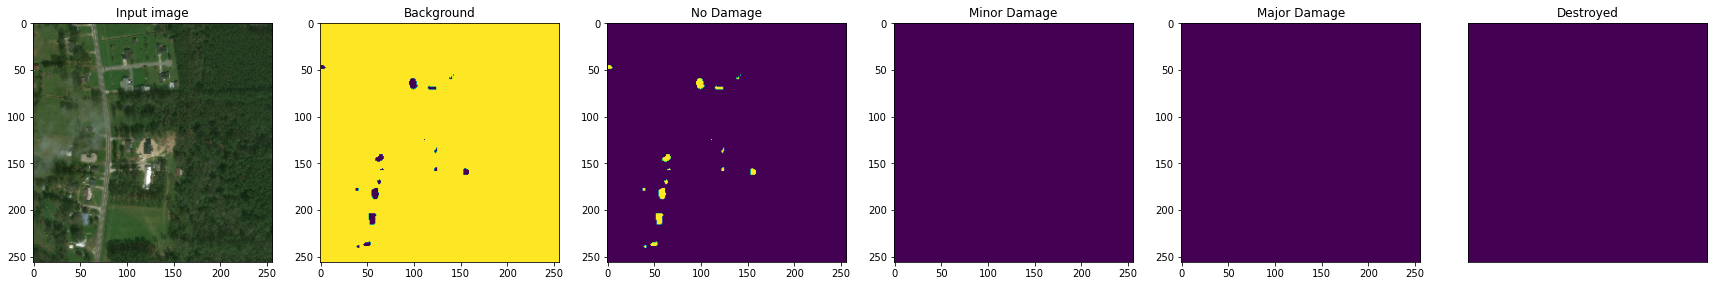

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000037_post_disaster.png
torch.Size([1, 3, 256, 256])


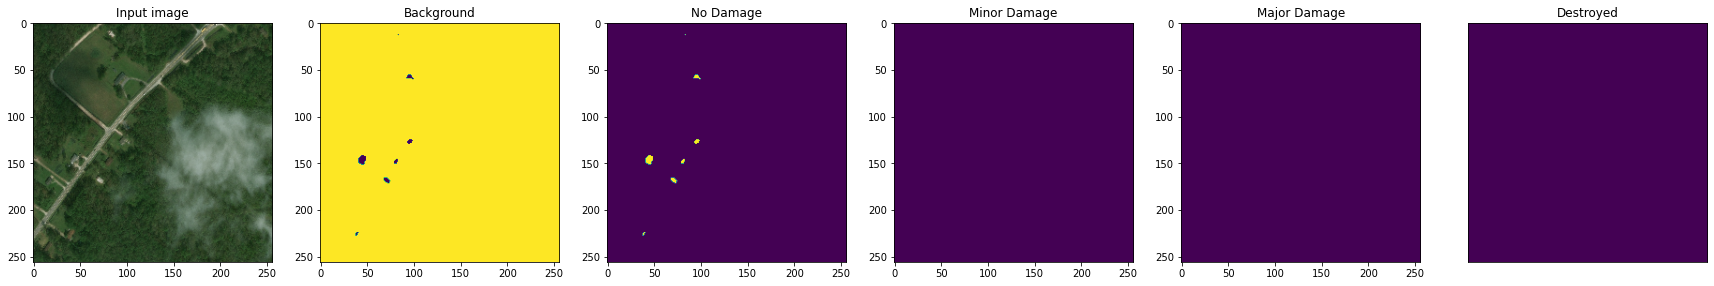

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000042_post_disaster.png
torch.Size([1, 3, 256, 256])


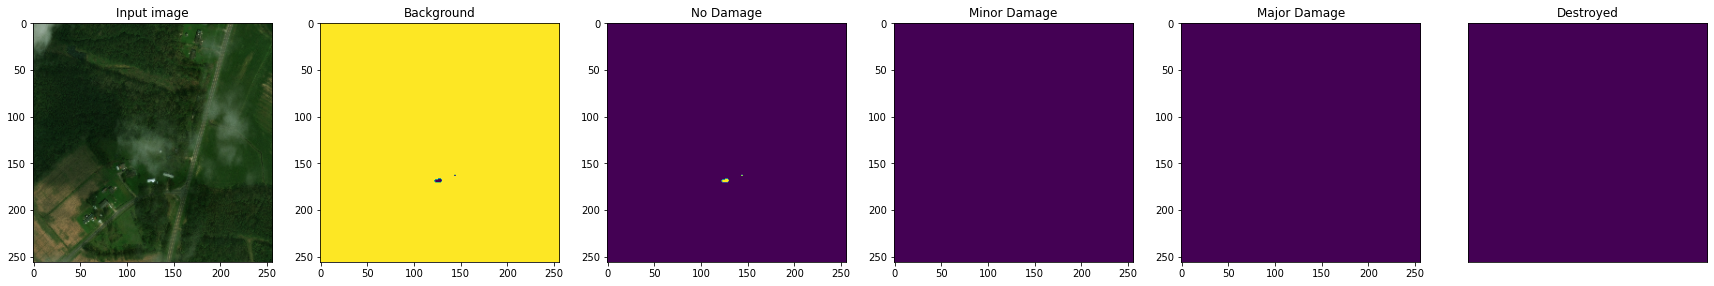

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000043_post_disaster.png
torch.Size([1, 3, 256, 256])


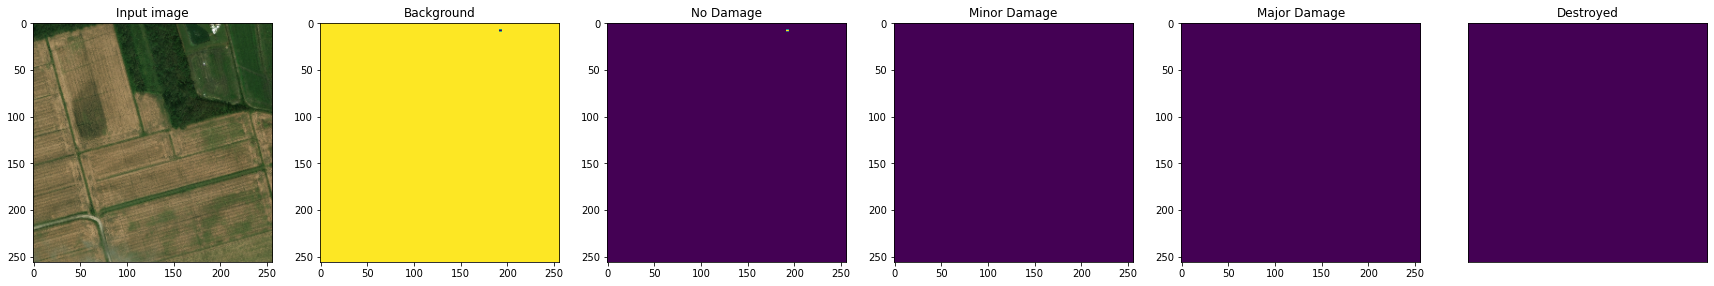

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000044_post_disaster.png
torch.Size([1, 3, 256, 256])


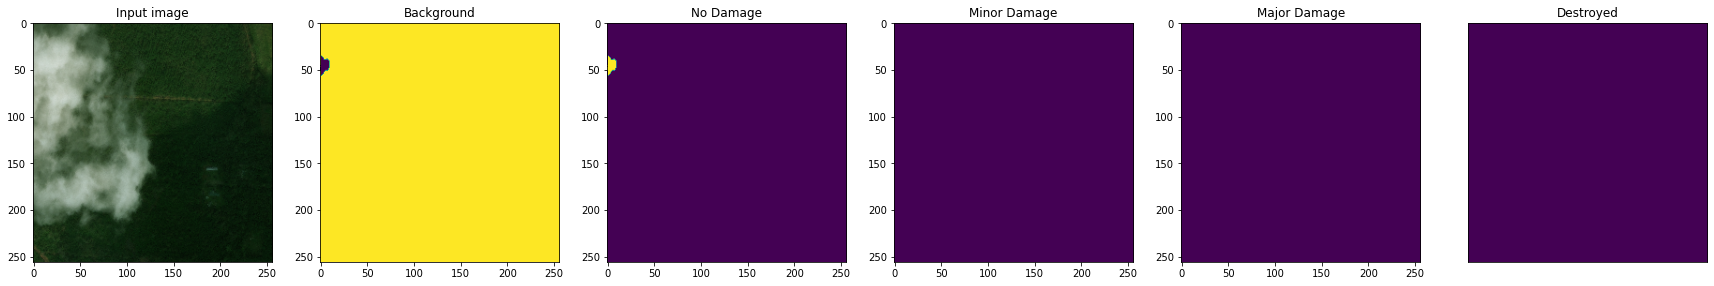

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000045_post_disaster.png
torch.Size([1, 3, 256, 256])


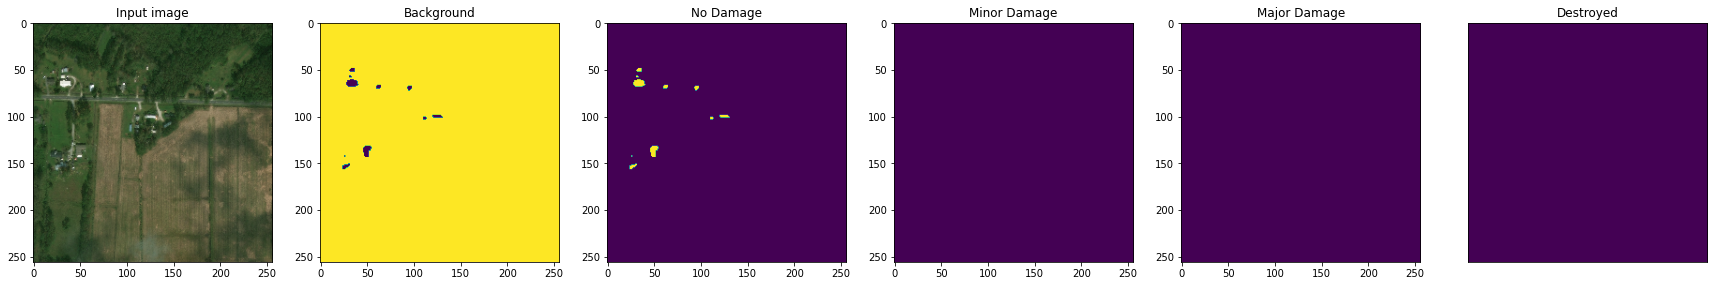

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000048_post_disaster.png
torch.Size([1, 3, 256, 256])


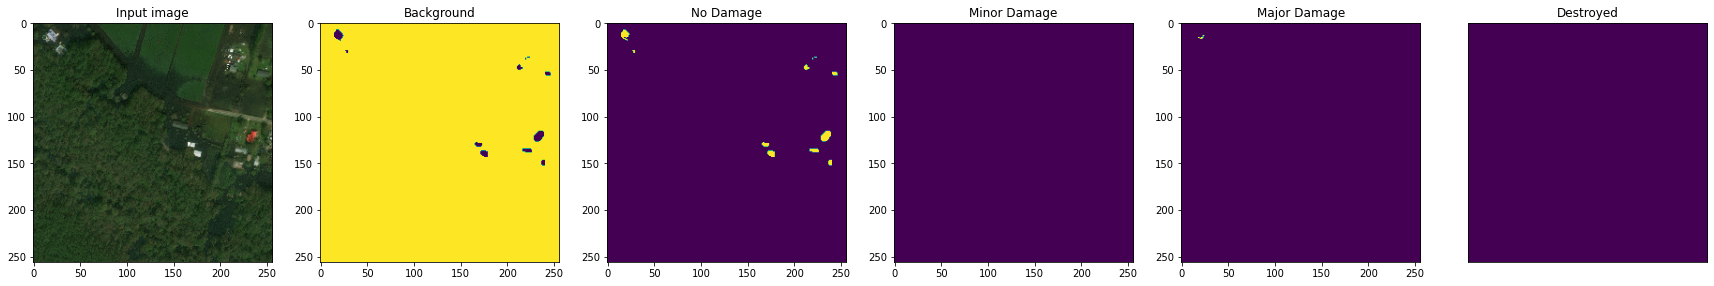

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000049_post_disaster.png
torch.Size([1, 3, 256, 256])


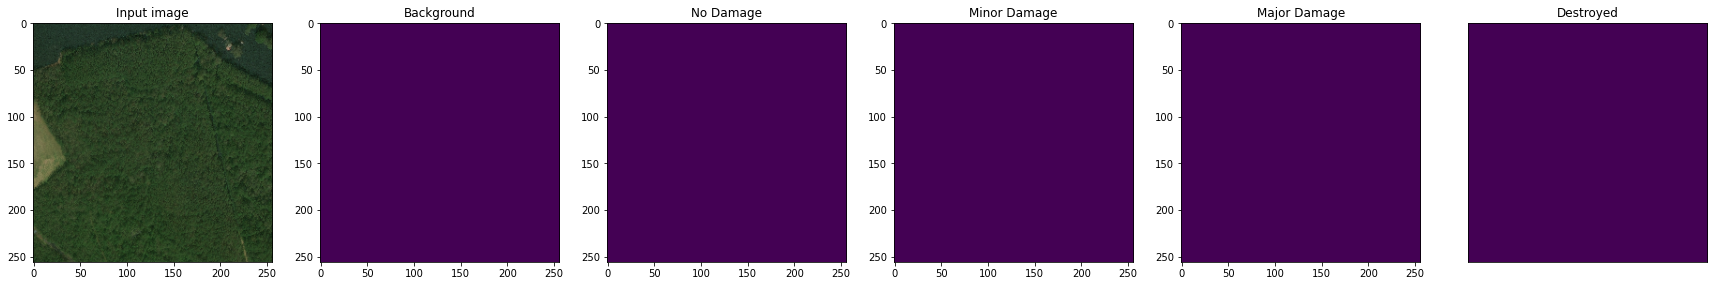

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000051_post_disaster.png
torch.Size([1, 3, 256, 256])


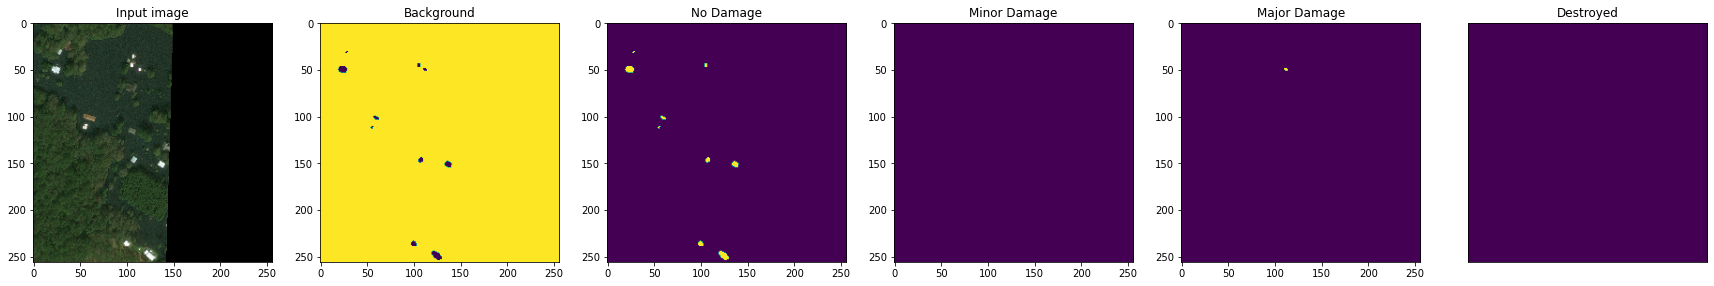

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000053_post_disaster.png
torch.Size([1, 3, 256, 256])


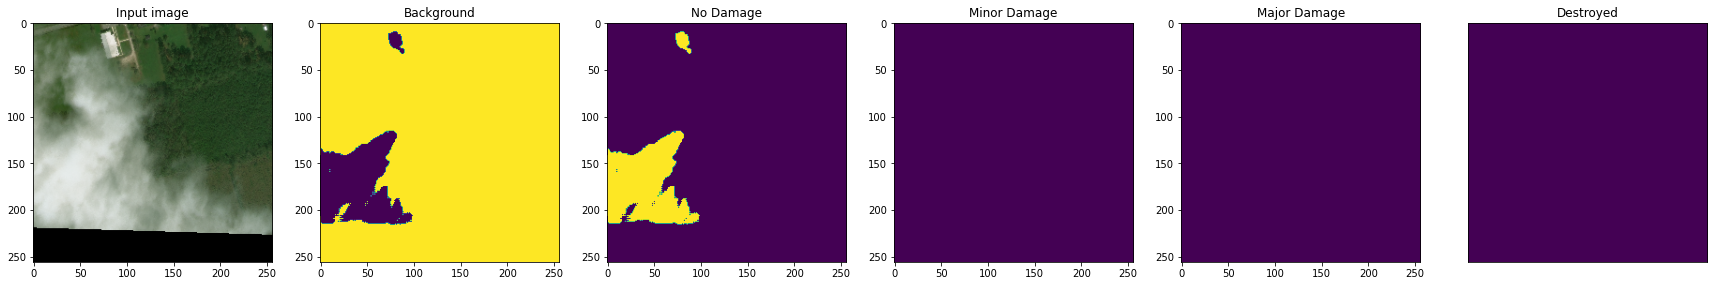

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000054_post_disaster.png
torch.Size([1, 3, 256, 256])


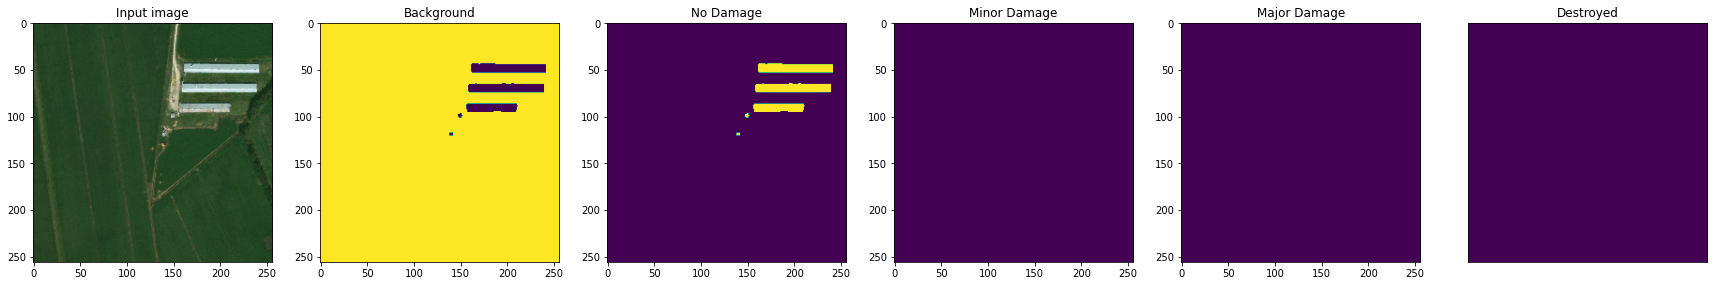

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000055_post_disaster.png
torch.Size([1, 3, 256, 256])


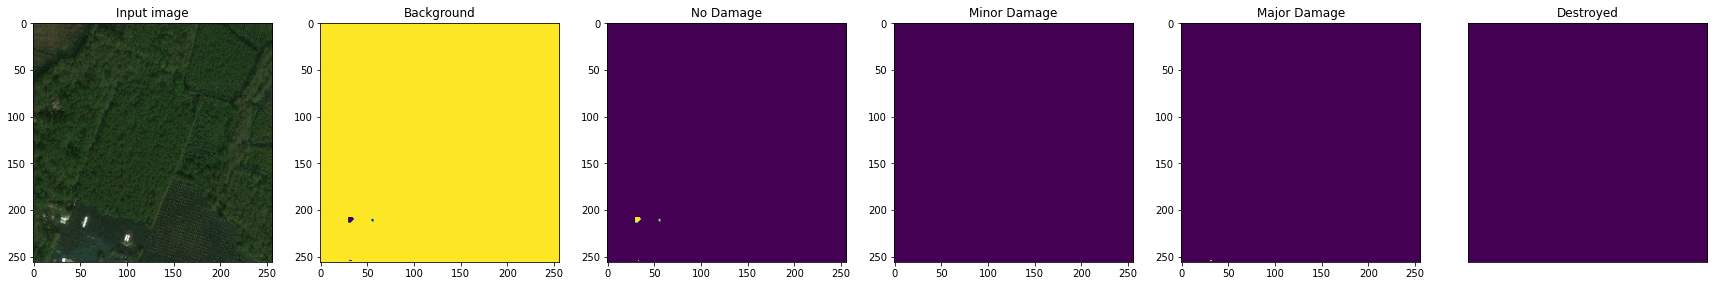

predicting .\Dataset\Tier1\Post\Image256\hurricane-florence_00000057_post_disaster.png
torch.Size([1, 3, 256, 256])


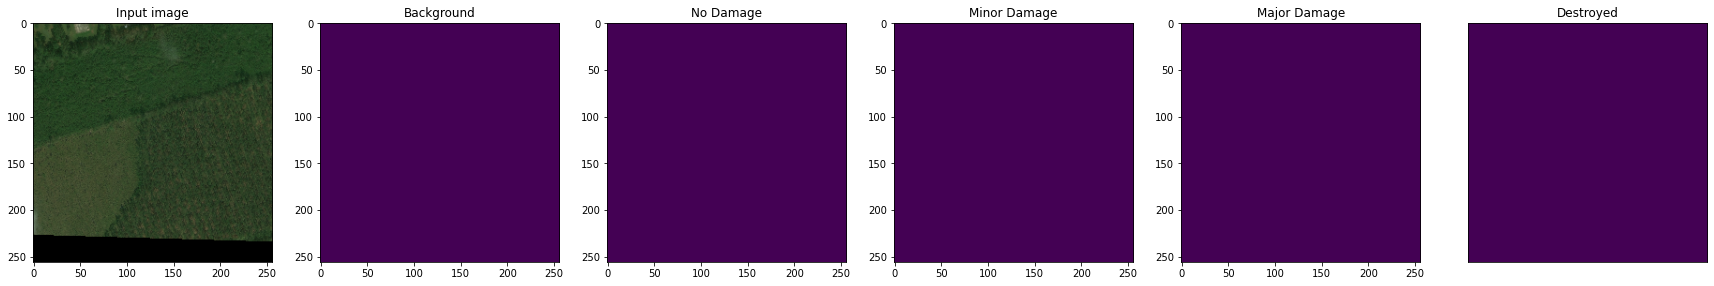

In [10]:
checkpoint = '.\\checkpoints\\checkpoint_epoch10.pth'
dir_img = '.\\Dataset\\Tier1\\Post\\Image256\\'
dir_mask = '.\\Dataset\\Tier1\\Post\\Label256\\'
mask_threshold = 0.5
no_save = True
viz = True
scale = 1
labels = ['Background','No Damage','Minor Damage','Major Damage','Destroyed']
if __name__ == '__main__':
    in_files = [dir_img + s for s in os.listdir(dir_img)][0:50]
    out_files = [dir_mask + s for s in os.listdir(dir_mask)][0:50]

    net = UNet(n_channels=3, n_classes=5, bilinear=False)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('loading model')

    net.to(device=device)
    net.load_state_dict(torch.load(checkpoint, map_location=device))

    print('model loaded')
    for i, filename in enumerate(in_files):
        print('predicting ' + filename)
        img = Image.open(filename)
        mask = predict_img(net=net,
                           full_img=img,
                           scale_factor=scale,
                           out_threshold=mask_threshold,
                           device=device)

        if not no_save:
            out_filename = out_files[i]
            result = mask_to_image(mask)
            result.save(out_filename)

        if viz:
            plot_img_and_mask(img, mask,labels)